In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

plt.style.use("seaborn-v0_8")

---
---
## Imbalanced data
Given data divided in classes, it's unbalanced if one class is represented by too few (or too many) samples compared to other classes. <br>
***IMPORTANT: SPLIT DATA IN TRAIN/VAL/TEST BEFORE RESAMPLE*** <br>
- **Oversampling**: resample(duplicate) the rare samples so that the resulting training set contains classes with an equal number of samples. 
    - *SMOTE (Synthetic Minority Oversampling Technique)*: synthetic tuples are added to the dataset: Synthetic samples are “close to” the given samples in the space.
- **Undersampling**: randomly eliminate tuples, decreasing the number of samples for the class with the larger number of tuples. With the excluded samples you can repeat the training (**trials**) 10/100 times, or you can use the remaining data to form the test set.

In [2]:
# Generate a random n-class classification problem:
# weights parameter to manage the proportions of samples assigned to each class
# flip_y parameter to manage the fraction of samples whose class is assigned randomly
X, y = make_classification(n_samples=1000, weights=[0.99], flip_y=0)
print(np.unique(y, return_counts=True))

# Oversample
oversample = RandomOverSampler(sampling_strategy="minority")
X_over, y_over = oversample.fit_resample(X, y)
print(np.unique(y_over, return_counts=True))

# Undersample
undersample = RandomUnderSampler(sampling_strategy="majority")
X_under, y_under = undersample.fit_resample(X, y)
print(np.unique(y_under, return_counts=True))

(array([0, 1]), array([990,  10]))
(array([0, 1]), array([990, 990]))
(array([0, 1]), array([10, 10]))


---
---
## Pre-Processing Techniques
[(doc sklearn)](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)

### Standardization
- ****IMPORTANT: MEAN AND VARIANCE MUST BE COMPUTED ONLY ON THE TRAINING SET AND APPLIED TO THE TRAIN/VAL/TEST SETS**** because we assume the train set is representative
- *WHAT*. Center the features at mean 0 and standard deviation 1. Mean and std are computed for each variable (along with all samples). It's a translation and shrinking/stretching, no change in distribution.
- *WHEN*. 
    - Typically when the data has Gaussian distribution. 
    - If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected. If you know that some inputs are more important than others, it may help to scale the inputs such that the more important ones have larger variances and/or ranges. 
    - Used if the algorithm assumes that all features are centered around zero or have variance in the same order. However, is very sensitive to the presence of outliers.

### PowerTransformer
- *WHAT*. Map data from any distribution to as close to a Gaussian distribution as possible to stabilize variance and minimize skewness. By default it applies zero-mean and unit variance normalization.
- *WHEN*. 
    - When Gaussian-like data is needed
    - When minimized skewness is needed

### Robust Scaling

- *WHAT*. Standardization removing the median and scaling the data according to the quantile range. It's robust to outliers in the sense that adding or removing outliers in the training set will yield approximately the same transformation, because it's not based on standard scaling with mean and variance.
- *WHEN*. 
    - When standardized data is needed
    - When there are lots of useless outliers

### Min-Max Scaling
- ****IMPORTANT: MAX AND MIN MUST BE COMPUTED ONLY ON THE TRAINING SET AND APPLIED TO THE TRAIN/VAL/TEST SETS**** because we assume the train set is representative
- *WHAT*. Rescale feature values to [0, 1] range. Min and max are computed for each variable (along with all the samples). It's a translation and shrinking/stretching, no change in distribution.
- *WHEN*. 
    - Useful in algorithms that do not assume any distribution of the data (like K-Nearest Neighbors and Neural Networks). However, the outliers have an influence when computing the empirical mean and standard deviation.

### Normalization
- *WHAT*. Rescale values in [0,1] or [-1,1]. Given a sample (row), the norm is computed over all the columns and applied (divided) only to the row (each row has its norm).
- *WHEN*. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.
    - L1 normalization scales the data so that the sum of the absolute values of each feature is equal to 1. Used in Feature Selection: L1 regularization (Lasso) adds the absolute value of the coefficient as a penalty term to the loss function, encouraging sparsity in the model. *It keeps the sparsity of the data and penalizes the extreme feature values.*
    - L2 normalization (or Spatial Sign Preprocessing) scales the data so that the sum of the squared values of each feature is equal to 1. Used in Linear regression: L2 regularization (Ridge) adds the squared magnitude of the coefficient as a penalty term to the loss function, preventing overfitting. *When you want to maintain the relative relationships between features and avoid extreme weights.*
    - MAX normalizaton, instead, scales the observation so that it gives more weight to the feature with highest values

In [3]:
# Dataset composed by 100 samples and 2 variables
columns = ["Feature1", "Feature2"]

if 1:
    X = pd.DataFrame(
        np.vstack(
            (
                [[200, 200]],
                [[-300, -200]],
                [[-200, -400]],
                [[550, 150]],
                np.random.uniform(-100, 100, size=(100, 2)),
            )
        ),
        columns=columns,
    )
else:
    X = pd.DataFrame(
        np.vstack(
            (
                [[200, 200]],
                [[-300, -200]],
                [[-200, -400]],
                [[550, 150]],
                np.random.normal(10, 50, size=(100, 2)),
            )
        ),
        columns=columns,
    )

In [4]:
# Standardization
if 0:
    X_standardized = preprocessing.StandardScaler().fit_transform(X)
else:
    # OR:
    X_mean, X_std = np.mean(X, axis=0), np.std(X, axis=0)
    X_standardized = ((X - X_mean) / X_std).values

In [5]:
# Min-Max Scaling
if 1:
    X_minmax = preprocessing.MinMaxScaler().fit_transform(X)
else:
    # OR:
    X_min, X_max = np.min(X, axis=0), np.max(X, axis=0)
    X_minmax = ((X - X_min) / (X_max - X_min)).values

In [6]:
# Robust Scaling
X_robust = preprocessing.RobustScaler().fit_transform(X)

In [7]:
# PowerTransformer
X_power = preprocessing.PowerTransformer().fit_transform(X)

In [8]:
# Normalization
if 1:
    X_normalized_l1 = preprocessing.normalize(X, norm="l1")
    X_normalized_l2 = preprocessing.normalize(X, norm="l2")
    X_normalized_lmax = preprocessing.normalize(X, norm="max")
else:
    # OR
    X_normalized_l1 = X.values / np.linalg.norm(X, ord=1, axis=1, keepdims=True)
    X_normalized_l2 = X.values / np.linalg.norm(X, ord=2, axis=1, keepdims=True)
    X_normalized_lmax = X.values / np.linalg.norm(X, ord="inf", axis=1, keepdims=True)

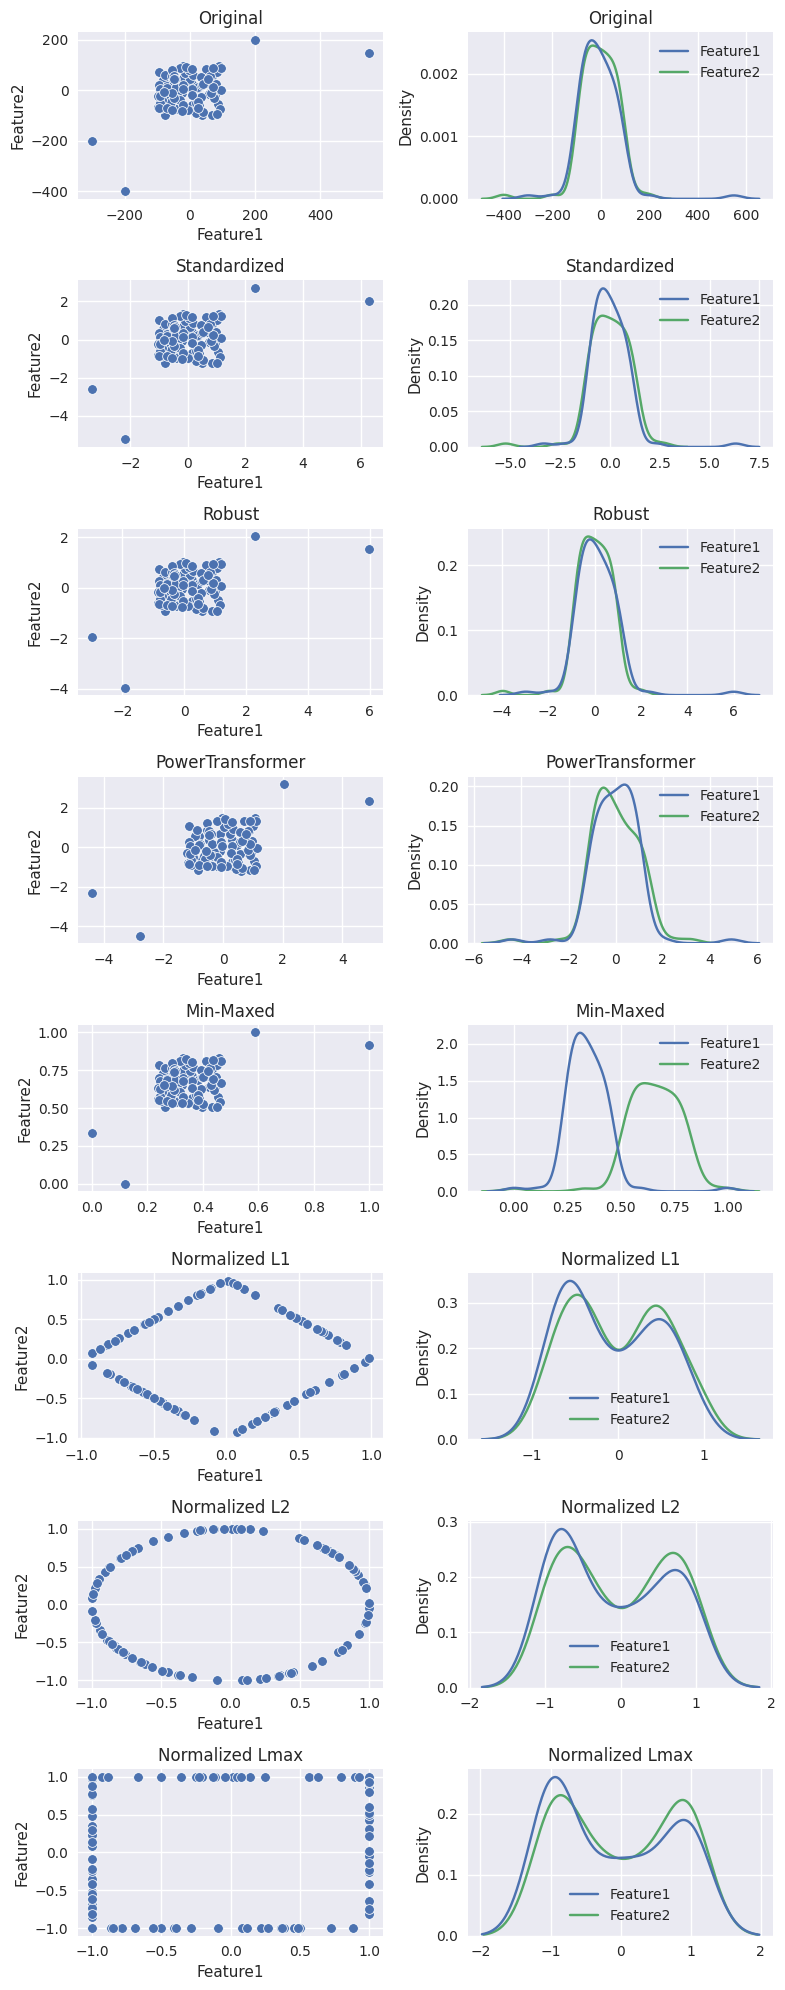

In [9]:
rows = 8
_, axes = plt.subplots(rows, 2, figsize=(8, 20))

for i, (title, data) in zip(
    [*range(rows)],
    [
        ("Original", X),
        ("Standardized", pd.DataFrame(X_standardized, columns=columns)),
        ("Robust", pd.DataFrame(X_robust, columns=columns)),
        ("PowerTransformer", pd.DataFrame(X_power, columns=columns)),
        ("Min-Maxed", pd.DataFrame(X_minmax, columns=columns)),
        ("Normalized L1", pd.DataFrame(X_normalized_l1, columns=columns)),
        ("Normalized L2", pd.DataFrame(X_normalized_l2, columns=columns)),
        ("Normalized Lmax", pd.DataFrame(X_normalized_lmax, columns=columns)),
    ],
):
    sns.scatterplot(x=data[columns[0]], y=data[columns[1]], ax=axes[i, 0]).set_title(title)
    sns.kdeplot(data, ax=axes[i, 1]).set_title(title)

plt.tight_layout()
plt.show()